In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,MultiLabelBinarizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

In [2]:
# Uploading files
from google.colab import files
uploaded=files.upload()

Saving anime.csv to anime (1).csv


In [3]:
# Reading csv file using pandas
df=pd.read_csv('anime.csv')
df.head() # Returns the first few rows of the dataset

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
df.tail() # Returns the last few rows of the dataset

,anime_id,name,genre,type,episodes,rating,members
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175
12293,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142


In [5]:
df.shape # Returns the shape of the dataset

(12294, 7)

In [6]:
df.size # Returns the size of the dataset

86058

In [7]:
df.info() # Returns the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [8]:
df.describe() # Returns the statistical information of the dataset

,anime_id,rating,members
count,12294.000000,12064.000000,1.229400e+04
mean,14058.221653,6.473902,1.807134e+04
std,11455.294701,1.026746,5.482068e+04
min,1.000000,1.670000,5.000000e+00
25%,3484.250000,5.880000,2.250000e+02
50%,10260.500000,6.570000,1.550000e+03
75%,24794.500000,7.180000,9.437000e+03
max,34527.000000,10.000000,1.013917e+06


In [9]:
df.isnull().sum() # Returns the no of missing values

,0
anime_id,0
name,0
genre,62
type,25
episodes,0
rating,230
members,0


In [10]:
df['rating']=df['rating'].fillna(df['rating'].median()) # Filling the missing values in the column 'rating' with median of the column 'rating'

In [11]:
df['genre']=df['genre'].fillna('Unknown') # Filling th missing values in the column 'genre' with 'Unknown'

In [12]:
df['type']=df['type'].fillna('Unknown')  # Filling th missing values in the column 'type' with 'Unknown'

In [13]:
df.isnull().sum() # Returns the no of missing values after imputation

,0
anime_id,0
name,0
genre,0
type,0
episodes,0
rating,0
members,0


In [14]:
df.duplicated().sum() # Returns no of duplicates

0

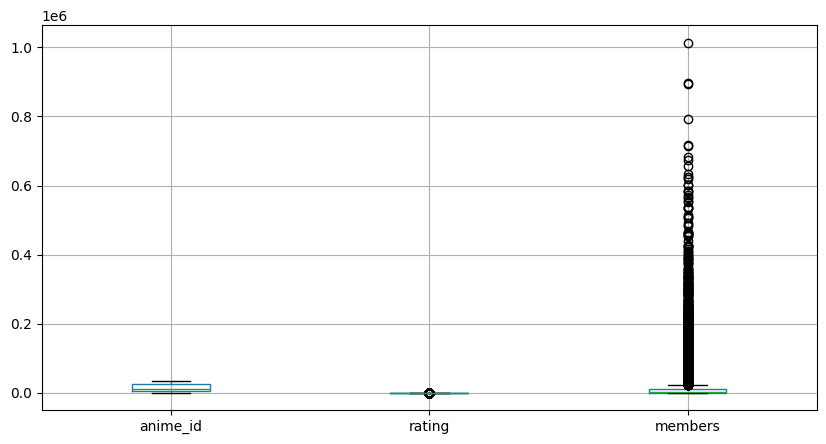

In [15]:
# Plots boxplot
plt.figure(figsize=(10,5))
df.boxplot()
plt.show()

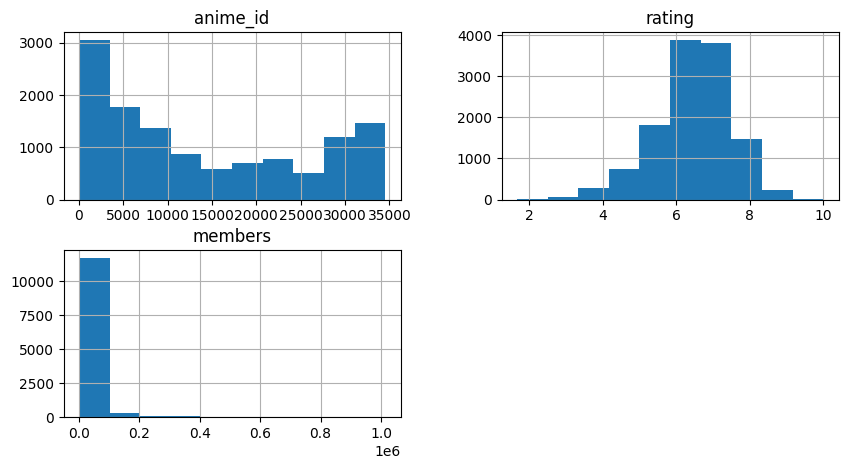

In [16]:
# Plots histogram
df.hist(figsize=(10,5))
plt.show()

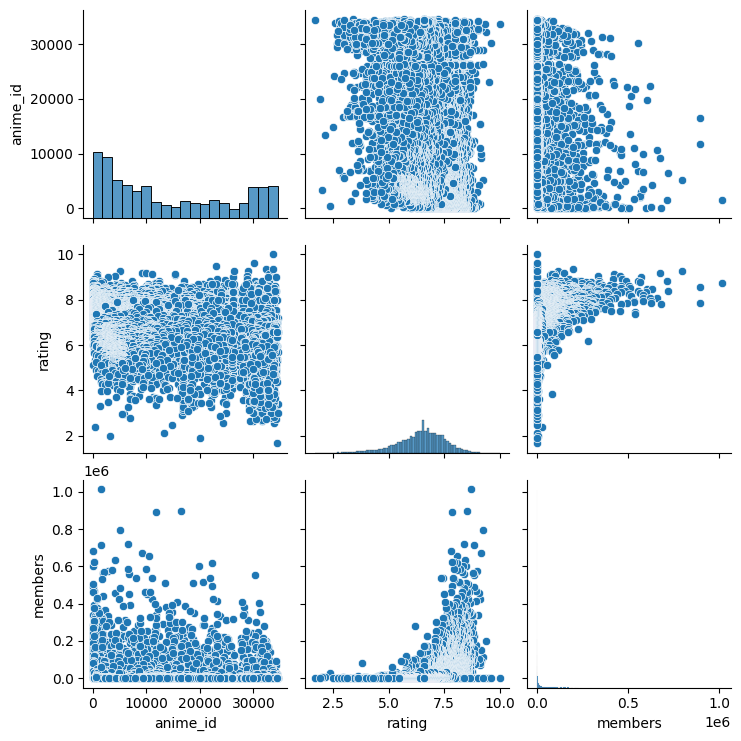

In [17]:
# Plots pairplot
sns.pairplot(df)
plt.show()

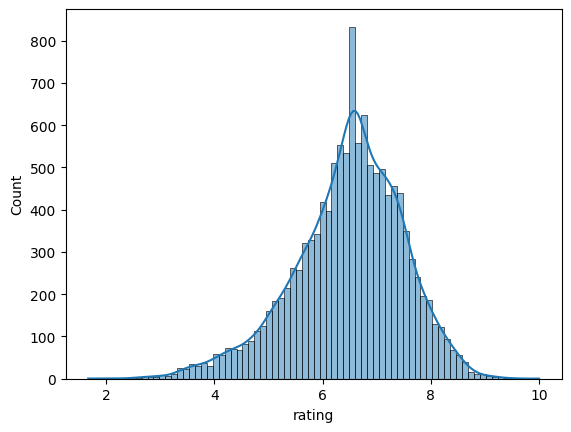

In [18]:
# Plots histplot for column 'rating'
sns.histplot(df['rating'],kde=True)
plt.show()

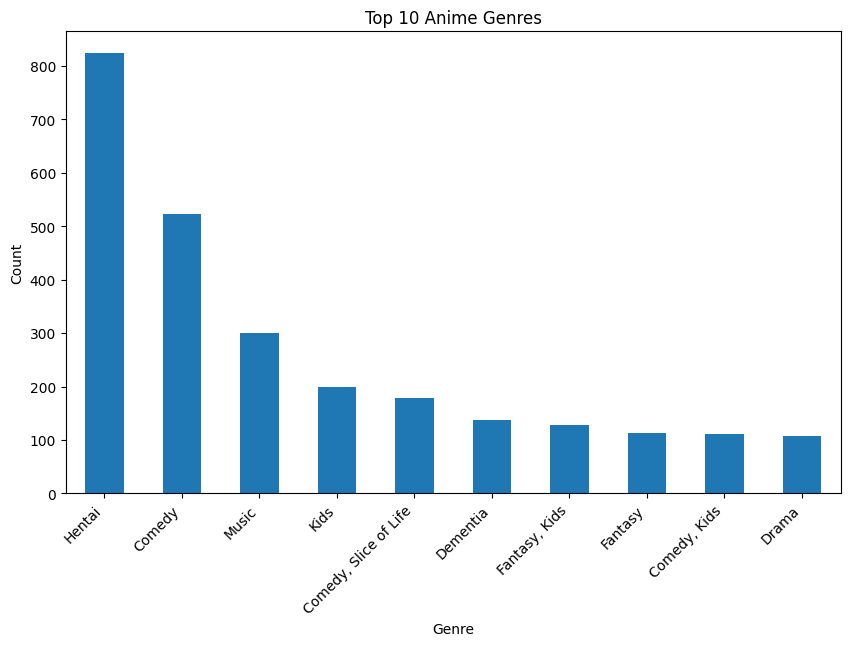

In [19]:
# Plots bar chart
plt.figure(figsize=(10, 6))
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Anime Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

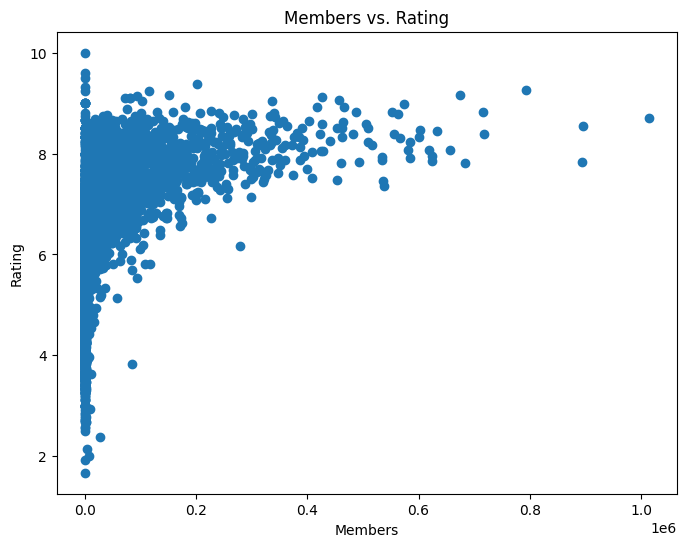

In [20]:
# Plots Scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(df['members'], df['rating'])
plt.title('Members vs. Rating')
plt.xlabel('Members')
plt.ylabel('Rating')
plt.show()

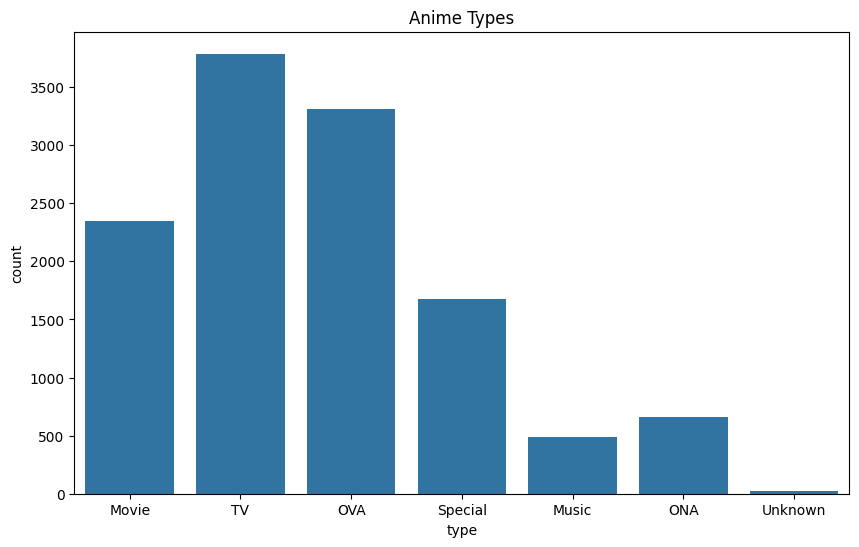

In [21]:
# Plots countplot
plt.figure(figsize=(10,6))
sns.countplot(x='type',data=df)
plt.title('Anime Types')
plt.show()

In [22]:
# Applying Scaling
scaler=MinMaxScaler()
df_scaled=scaler.fit_transform(df[['rating','members']])
df_scaled

array([[9.24369748e-01, 1.97872202e-01],
       [9.11164466e-01, 7.82770102e-01],
       [9.09963986e-01, 1.12689267e-01],
       ...,
       [3.85354142e-01, 2.11063682e-04],
       [3.97358944e-01, 1.67667411e-04],
       [4.54981993e-01, 1.35120208e-04]])

In [23]:
df[['rating','members']]=df_scaled

In [24]:
df['genre'].value_counts() # Returns value counts in the column 'genre'

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Adventure, Drama, Fantasy, Game, Sci-Fi",1
"Adventure, Demons, Fantasy, Historical",1
"Action, Comedy, Drama, Mecha, Music, Sci-Fi, Shounen",1


In [25]:
df['type'].value_counts()

,count
type,
TV,3787
OVA,3311
Movie,2348
Special,1676
ONA,659
Music,488
Unknown,25


In [26]:
df['genre'].nunique()

3265

In [27]:
df['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', 'Unknown'],
      dtype=object)

In [28]:
df['name'].value_counts()

,count
name,
Shi Wan Ge Leng Xiaohua,2
Saru Kani Gassen,2
Bakabon Osomatsu no Karee wo Tazunete Sansenri,1
Backkom Meogeujan Yeohaeng,1
Backkom Mission Impossible,1
...,...
Yoroiden Samurai Troopers Kikoutei Densetsu,1
Yuu☆Yuu☆Hakusho: Mu Mu Hakusho,1
3-gatsu no Lion meets Bump of Chicken,1


In [29]:
# Appliying Multi-Hot Encoding
mlb=MultiLabelBinarizer()

In [30]:
genre_encoded=mlb.fit_transform(df['genre'].str.split(','))
genre_df=pd.DataFrame(genre_encoded,columns=mlb.classes_,index=df.index)
# Concatenate the encoded genres with the original dataframe
df=pd.concat([df,genre_df],axis=1)

In [31]:
type_encoded=pd.get_dummies(df['type'],prefix='type',dtype='int')
df=pd.concat([df,type_encoded],axis=1)

In [32]:
# Clean 'episodes' column (convert to numerical, handle 'Unknown')
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce').fillna(0).astype(int)


In [33]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,Adventure,Cars,Comedy,...,Unknown,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,0.924370,0.197872,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,0.911164,0.782770,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.909964,0.112689,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,0.900360,0.664325,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,0.899160,0.149186,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [34]:
df.drop(['genre','type'],axis=1,inplace=True)

In [35]:
df.head()

,anime_id,name,episodes,rating,members,Adventure,Cars,Comedy,Dementia,Demons,...,Unknown,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,32281,Kimi no Na wa.,1,0.924370,0.197872,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64,0.911164,0.782770,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,28977,Gintama°,51,0.909964,0.112689,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,9253,Steins;Gate,24,0.900360,0.664325,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9969,Gintama&#039;,51,0.899160,0.149186,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# COSINE SIMILARITY

In [36]:
df1 = df[['name', 'rating', 'members'] + list(mlb.classes_) + list(type_encoded.columns)] # df1

In [37]:
df1.set_index('name', inplace=True) # Setting 'name' column as index

In [38]:
df1.head()

,rating,members,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Unknown,Vampire,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.924370,0.197872,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Fullmetal Alchemist: Brotherhood,0.911164,0.782770,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
Gintama°,0.909964,0.112689,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Steins;Gate,0.900360,0.664325,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Gintama&#039;,0.899160,0.149186,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [39]:
similarities=cosine_similarity(df1) # Similarities
similarities

array([[1.        , 0.13366327, 0.11961836, ..., 0.10011483, 0.10300589,
        0.3938932 ],
       [0.13366327, 1.        , 0.42873892, ..., 0.07799016, 0.08023581,
        0.09083347],
       [0.11961836, 0.42873892, 1.        , ..., 0.08046409, 0.08278863,
        0.09373207],
       ...,
       [0.10011483, 0.07799016, 0.08046409, ..., 1.        , 0.99996891,
        0.53974678],
       [0.10300589, 0.08023581, 0.08278863, ..., 0.99996891, 1.        ,
        0.54107319],
       [0.3938932 , 0.09083347, 0.09373207, ..., 0.53974678, 0.54107319,
        1.        ]])

In [40]:
df1.index

Index(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       'Steins;Gate', 'Gintama&#039;',
       'Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou',
       'Hunter x Hunter (2011)', 'Ginga Eiyuu Densetsu',
       'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',
       'Gintama&#039;: Enchousen',
       ...
       'Super Erotic Anime', 'Taimanin Asagi 3', 'Teleclub no Himitsu',
       'Tenshi no Habataki Jun', 'The Satisfaction',
       'Toushindai My Lover: Minami tai Mecha-Minami', 'Under World',
       'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'],
      dtype='object', name='name', length=12294)

In [41]:
# Recommendation system
def recommended_anime(anime_name):
    if anime_name in df1.index:
        index= np.where(anime_name==df1.index)[0][0]
        similar_anime= sorted(list(enumerate(similarities[index])),key=lambda x: x[1],reverse=True)[1:6]
        print(f'Recommended_Animes of {anime_name}')
        print('-'*20)
        for anime in similar_anime:
            print(df1.index[anime[0]])
    else:
        print('Movie is not in the list')

In [42]:
recommended_anime('Kimi no Na wa.')

Recommended_Animes of Kimi no Na wa.
--------------------
Kokoro ga Sakebitagatterunda.
Harmonie
Air Movie
Hotarubi no Mori e
&quot;Bungaku Shoujo&quot; Movie


In [43]:
recommended_anime('Under World')

Recommended_Animes of Under World
--------------------
Tenshi no Habataki Jun
The Satisfaction
Hokenshitsu de Aimashou
Toushindai My Lover: Minami tai Mecha-Minami
Super Erotic Anime


# **EVALUATION**

In [44]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(df1, test_size=0.2, random_state=42)


In [45]:
# Function to get recommendations
def get_recommendations(anime_name, similarities, df1):
    if anime_name in df1.index:
        index = np.where(anime_name == df1.index)[0][0]
        similar_anime = sorted(list(enumerate(similarities[index])), key=lambda x: x[1], reverse=True)[1:6]  # Top 5 recommendations
        return [df1.index[anime[0]] for anime in similar_anime]
    else:
        return []

In [46]:
# Evaluate on the test set
precision = []
recall = []
f1 = []

for anime_name in test_data.index:
  # Get actual and predicted recommendations
  actual_recommendations = [] # Replace with your actual logic to determine relevant anime for this anime
  index = np.where(anime_name == df1.index)[0][0]  # Get index of current anime
  for i, similarity in enumerate(similarities[index]):
      if similarity > 0.8 and df1.index[i] != anime_name:  # Adjust threshold as needed
          actual_recommendations.append(df1.index[i])  # Add similar anime to actual recommendations
  predicted_recommendations = get_recommendations(anime_name, similarities, df1)


In [47]:
#Calculate metrics
true_positives = len(set(actual_recommendations) & set(predicted_recommendations))
false_positives = len(set(predicted_recommendations) - set(actual_recommendations))
false_negatives = len(set(actual_recommendations) - set(predicted_recommendations))

if (true_positives + false_positives) > 0:
  prec = true_positives / (true_positives + false_positives)
  precision.append(prec)

if (true_positives + false_negatives) > 0:
  rec = true_positives / (true_positives + false_negatives)
  recall.append(rec)

if (prec+rec) > 0:
  f1.append(2*(prec*rec)/(prec+rec))

In [48]:
# Calculate average metrics across all animes in the test set
avg_precision = np.mean(precision) if precision else 0
avg_recall = np.mean(recall) if recall else 0
avg_f1 = np.mean(f1) if f1 else 0

print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-score: {avg_f1:.4f}")

Average Precision: 1.0000
Average Recall: 0.0239
Average F1-score: 0.0467


Analysis:
 - Recall is low. The model is missing many relevant items.
 - F1-score is low, indicating a balance problem between precision and recall

Potential areas for improvement:
 - Exploring different similarity metrics (e.g., adjusted cosine similarity)
 - Feature engineering: Include additional relevant features
 - Tuning hyperparameters
 - Trying different recommendation algorithms

**Interview Questions**

1. Can you explain the difference between user-based and item-based collaborative filtering?

User Based Collabrative Filtering:

* This approach finds users who have similar preferences to the target user
* Process:
   * Find similar users: Identify users who have rated items similarly to the target user (e.g., using cosine similarity between their rating vectors).
   * Predict ratings: Predict the target user's rating for an item based on the ratings of similar users for that item (e.g., by averaging their ratings).
   * Recommend: Recommend items that similar users have rated highly but the target user hasn't rated yet.
   
Item Based Colabrative Filtering:

* Focus: This approach identifies items that are similar to items the target user has liked in the past.
* Process:
    * Find similar items: Calculate similarity between items based on how users have rated them (e.g., using cosine similarity between item rating vectors).
    * Predict ratings: Predict the target user's rating for an item based on their ratings for similar items.
    * Recommend: Recommend items that are similar to items the target user has rated highly.


2. What is collaborative filtering, and how does it work?

Collaborative filtering is a technique used by recommender systems to predict the preferences of a user by collecting information about the preferences of other users. It's based on the idea that people with similar tastes tend to like similar things.

How does it work?

1. **Data Collection:** Collaborative filtering starts by gathering data about users' preferences, typically in the form of ratings, reviews, or interactions (e.g., purchases, clicks, views). This data is often represented as a user-item matrix, where rows represent users, columns represent items, and cells contain ratings or interactions.

2. **Finding Similar Users or Items:**

 * User-Based:Identifies users with similar tastes to the target user by comparing their rating patterns. Similarity can be calculated using metrics like cosine similarity or Pearson correlation.
* Item-Based: Identifies items that are similar to items the target user has liked in the past. Similarity is calculated by comparing the rating patterns of users for different items.

3. **Prediction:** Once similar users or items are found, collaborative filtering makes predictions about the target user's preferences:

* User-Based: Predicts the target user's rating for an item based on the ratings of similar users for that item.
* Item-Based: Predicts the target user's rating for an item based on their ratings for similar items.
4. **Recommendation:** Finally, the system recommends items that are predicted to be of interest to the target user. These are typically items that similar users have liked or items that are similar to items the target user has liked in the past.
